In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/A_channels_list.csv')

In [6]:
df

,Media Type,Media Name,Twitter,Instagram,Facebook
0,Television/ Radio Media,ABC,1.1M,4.6M,1.6M
1,Television/ Radio Media,Fox News,1.8M,9.4M,645k
2,Television/ Radio Media,CNN,62.9M,2M,3.1M
3,Television/ Radio Media,NBC,9.4M,3.9M,199k
4,Television/ Radio Media,NPR,2.8M,427k,511k
5,Newspapers/Magazines,New York Times,55.3M,18.4M,286k
6,Newspapers/Magazines,Wall Street Journal,20.6M,4.9M,7.3M
7,Newspapers/Magazines,The Guardian,10.8M,468k,700K
8,Newspapers/Magazines,The Washington Post,20M,6.8M,7.4M
9,Newspapers/Magazines,The Boston Globe,"8,862",305k,551K


<Figure size 640x480 with 0 Axes>

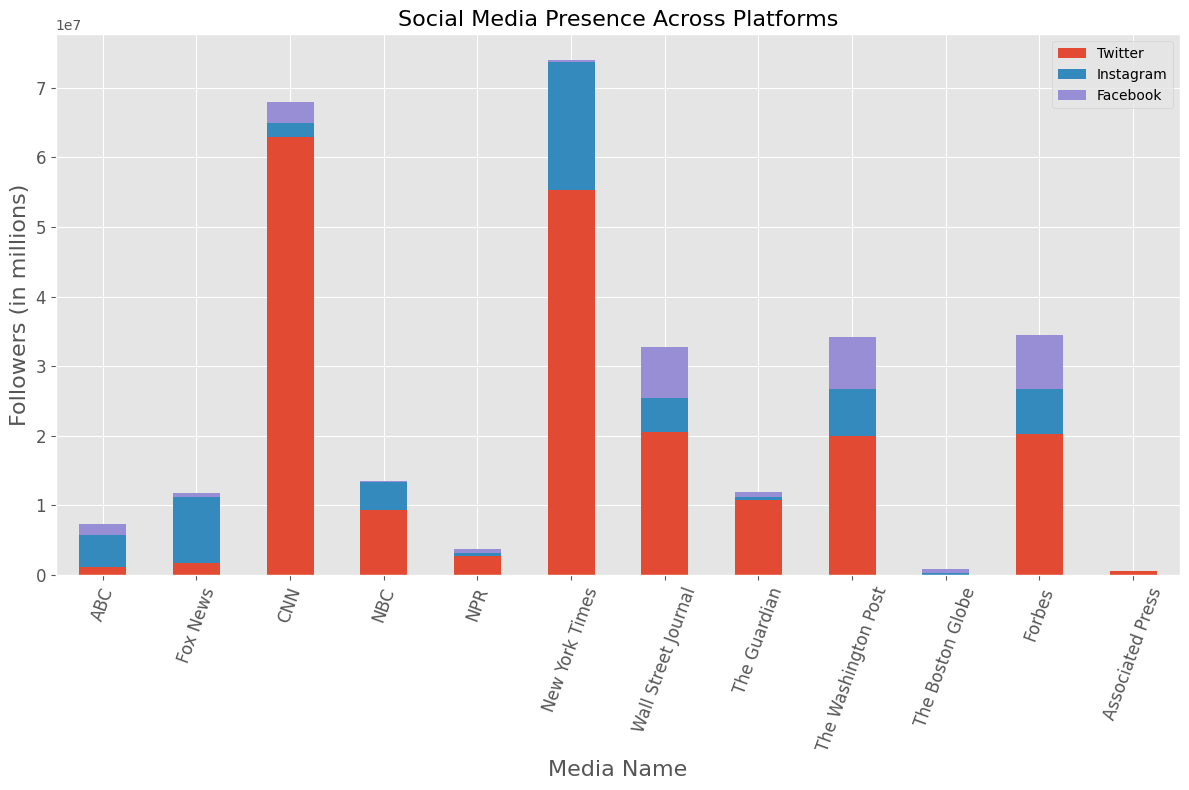

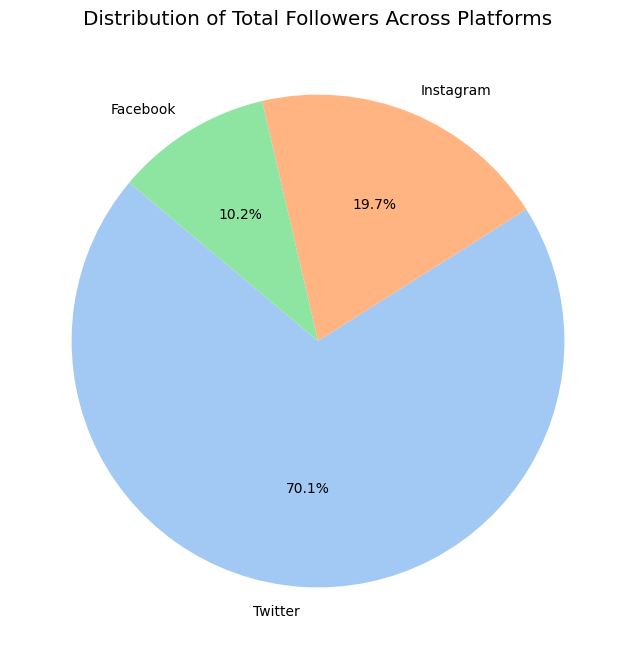

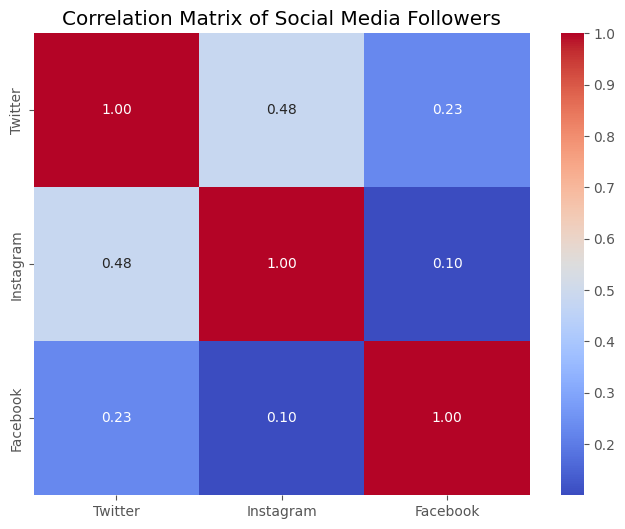

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_and_convert(value):
    """
    Remove commas from numbers and convert 'M', 'k', and 'K' suffixes to numeric values.
    """
    if isinstance(value, str):
        value = value.replace(',', '')
        value = value.replace('M', 'e6').replace('k', 'e3').replace('K', 'e3')  # Handle both 'k' and 'K'
        return pd.to_numeric(value, errors='coerce')
    return value

# Applying the cleaning and conversion to the Twitter, Instagram, and Facebook columns
df['Twitter'] = df['Twitter'].apply(clean_and_convert)
df['Instagram'] = df['Instagram'].apply(clean_and_convert)
df['Facebook'] = df['Facebook'].apply(clean_and_convert)

# Set the style for the plots
plt.style.use('ggplot')

# Function to plot all the visualizations
def plot_visualizations(df):
    # 1. Bar plot for social media presence across platforms
    # plt.figure(figsize=(30, 21))
    plt.figure()
    df.plot(kind='bar', x='Media Name', y=['Twitter', 'Instagram', 'Facebook'], stacked=True, figsize=(12, 8))  # Set figsize here
    plt.title('Social Media Presence Across Platforms',fontsize= 16)
    plt.ylabel('Followers (in millions)', fontsize= 16)
    plt.xlabel('Media Name', fontsize= 16)
    plt.xticks(rotation=70, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    # 2. Pie chart of total followers per platform
    total_followers = df[['Twitter', 'Instagram', 'Facebook']].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(total_followers, labels=total_followers.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Total Followers Across Platforms')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['Twitter', 'Instagram', 'Facebook']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Social Media Followers')
    plt.show()

plot_visualizations(df)